### **PREDICTION OF LUNG CANCER USING HISTOPATHOGICAL IMAGES**

###1. Importing necessary libraries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
import cv2
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

###2. Loading data and their labels

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
path='/content/Drive/MyDrive/Data Set/lung_image_sets'
classes=os.listdir(path)

In [ ]:
classes

['lung_aca', 'lung_n', 'lung_scc']

In [ ]:
images=[]
labels=[]

In [ ]:
#image_path1=os.path.join(path,classes[0])
#image_path2=os.path.join(path,classes[1])
#image_path3=os.path.join(path,classes[2])

#### Loading and resizing the data

In [ ]:
for f in range(len(classes)):
  image_path=os.path.join(path,classes[f])
  for i in os.listdir(image_path):
    img=cv2.imread(os.path.join(image_path,i))
    if img is not None:
      images.append(cv2.resize(img,(224,224)))
      labels.append(classes[f])


In [ ]:
#count=0
#for f in os.listdir(image_path3):
#  img = cv2.imread(os.path.join(image_path3,f))
#  if img is not None:
#    count +=1
#    if count <= 1500:
#      images.append(img)
#      labels.append(classes[2])
#    else:
#      break

array([[[221, 103, 168],
        [224, 107, 168],
        [230, 113, 170],
        ...,
        [216,  91, 128],
        [200,  78, 119],
        [209,  90, 138]],

       [[222, 105, 168],
        [224, 108, 168],
        [223, 109, 164],
        ...,
        [196,  71, 110],
        [199,  75, 121],
        [190,  70, 122]],

       [[226, 107, 168],
        [226, 110, 168],
        [223, 111, 165],
        ...,
        [192,  61,  98],
        [182,  50,  96],
        [191,  64, 119]],

       ...,

       [[205,  82, 122],
        [215,  86, 131],
        [206,  75, 126],
        ...,
        [223, 119, 170],
        [223, 121, 168],
        [227, 125, 172]],

       [[206,  85, 123],
        [190,  64, 107],
        [212,  84, 134],
        ...,
        [223, 120, 171],
        [221, 122, 168],
        [227, 130, 174]],

       [[211,  92, 128],
        [199,  75, 117],
        [201,  75, 124],
        ...,
        [215, 112, 163],
        [213, 116, 161],
        [212, 117, 158]]], dtype=uint8)
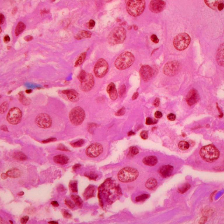

In [ ]:
images[250]

####3.Converting in to arrays

In [ ]:
x=[]
#for i in range(0,len(images)):
# x.append(cv2.resize(images[i],(224,224)))


In [ ]:
for i in range(0,len(images)):
  #x.append(cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY))
  x.append(images[i])


In [ ]:
x=np.asarray(x)

In [ ]:
x.shape

(15000, 224, 224, 3)

###4. Processing labels

In [ ]:
labels1=pd.Series(labels)
labels1

0        lung_aca
1        lung_aca
2        lung_aca
3        lung_aca
4        lung_aca
           ...   
14995    lung_scc
14996    lung_scc
14997    lung_scc
14998    lung_scc
14999    lung_scc
Length: 15000, dtype: object

In [ ]:
np.unique(labels,return_counts=True)

(array(['lung_aca', 'lung_n', 'lung_scc'], dtype='<U8'),
 array([5000, 5000, 5000]))

In [ ]:
labels1.replace('lung_scc',1,inplace=True)
labels1.replace('lung_aca',2,inplace=True)
labels1.replace('lung_n',0,inplace=True)

In [ ]:
labels1.unique()

array([2, 0, 1])

###5. One hot encoding of labels

In [ ]:
from keras.utils import to_categorical
y = to_categorical(labels1, dtype ="uint8")

In [ ]:
#y=pd.get_dummies(labels).values
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

###6. Split data in to train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13,stratify=y)

In [ ]:
x_train.shape,y_train.shape

((12000, 224, 224, 3), (12000, 3))

In [ ]:
x_test.shape,y_test.shape

((3000, 224, 224, 3), (3000, 3))

###7. Model Architecture

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
#model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(units = 3, activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      2

###8. Model Complie

In [ ]:
#opt = Adam(learning_rate=0.0001)
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,verbose=1)

Epoch 1/30
375/375 [==============================] - 63s 120ms/step - loss: 0.4210 - accuracy: 0.8554 - val_loss: 0.4700 - val_accuracy: 0.8743
Epoch 2/30
375/375 [==============================] - 45s 120ms/step - loss: 0.2364 - accuracy: 0.9279 - val_loss: 0.3432 - val_accuracy: 0.8760
Epoch 3/30
375/375 [==============================] - 46s 123ms/step - loss: 0.2106 - accuracy: 0.9357 - val_loss: 0.1377 - val_accuracy: 0.9580
Epoch 4/30
375/375 [==============================] - 46s 124ms/step - loss: 0.1483 - accuracy: 0.9545 - val_loss: 0.0852 - val_accuracy: 0.9727
Epoch 5/30
375/375 [==============================] - 46s 123ms/step - loss: 0.1087 - accuracy: 0.9707 - val_loss: 0.0766 - val_accuracy: 0.9717
Epoch 6/30
375/375 [==============================] - 46s 123ms/step - loss: 0.0937 - accuracy: 0.9763 - val_loss: 0.1690 - val_accuracy: 0.9417
Epoch 7/30
375/375 [==============================] - 46s 124ms/step - loss: 0.0774 - accuracy: 0.9801 - val_loss: 0.0914 - val_ac

### Building Confusion matrix

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target.argmax(axis=1), y_pred.argmax(axis=1))
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3,3)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay
)

94/94 [==============================] - 3s 29ms/step


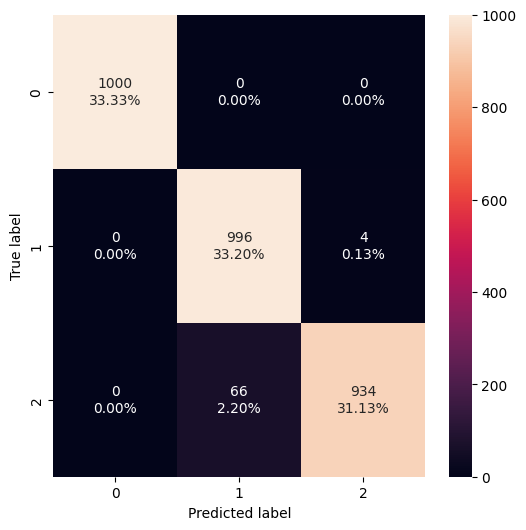

In [ ]:
confusion_matrix_statsmodels(
    model, x_test, y_test, threshold=0.5)

In [ ]:
y_pred=model.predict(x_test)
y_pred

94/94 [==============================] - 3s 28ms/step


array([[2.7188446e-05, 1.0840927e-04, 9.9986434e-01],
       [2.2509064e-05, 9.9980742e-01, 1.7012258e-04],
       [1.8973622e-04, 1.0674368e-03, 9.9874288e-01],
       ...,
       [9.9994624e-01, 1.7208511e-05, 3.6615962e-05],
       [9.9998903e-01, 5.1994821e-06, 5.7687807e-06],
       [9.2589198e-06, 9.9995112e-01, 3.9569179e-05]], dtype=float32)

In [ ]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[1000,    0,    0],
       [   0,  996,    4],
       [   0,   66,  934]])

### Loss curve

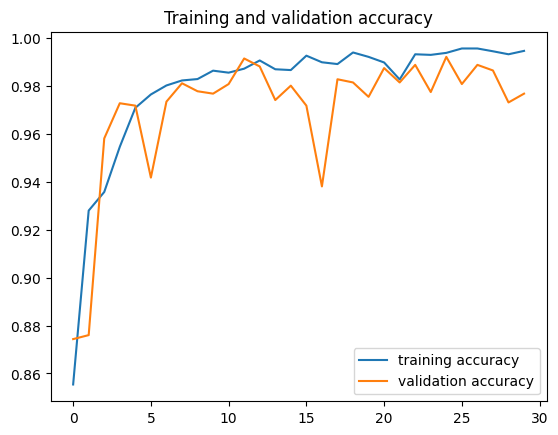

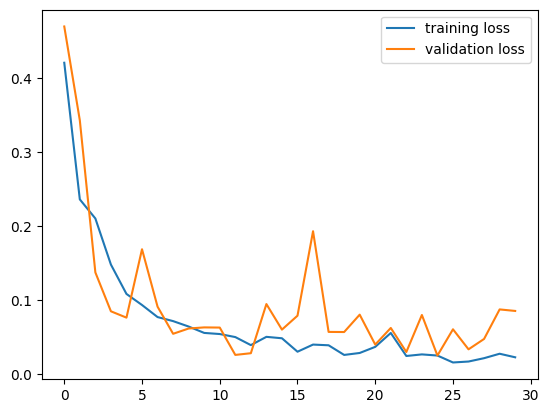

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')

### Saving the model

In [ ]:
model.save('model_basic.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
